
# Multiple Linear Regression with Linear Algebra

This notebook builds on the previous **Simple Linear Regression** notebook where we used linear algebra to solve for a single feature and intercept.

Now, we expand the method to **multiple features** — and the beauty of linear algebra is that **the exact same steps apply**, no matter how many variables we include. This is the true power of matrix-based computation in machine learning: all variables are embedded within matrices, making the workflow scalable and efficient.


In [3]:

import numpy as np

data = np.loadtxt('data/multiple_linear_regression_dataset.csv', delimiter=',', skiprows=1)
print(data)


[[2.500e+01 1.000e+00 3.045e+04]
 [3.000e+01 3.000e+00 3.567e+04]
 [4.700e+01 2.000e+00 3.158e+04]
 [3.200e+01 5.000e+00 4.013e+04]
 [4.300e+01 1.000e+01 4.783e+04]
 [5.100e+01 7.000e+00 4.163e+04]
 [2.800e+01 5.000e+00 4.134e+04]
 [3.300e+01 4.000e+00 3.765e+04]
 [3.700e+01 5.000e+00 4.025e+04]
 [3.900e+01 8.000e+00 4.515e+04]
 [2.900e+01 1.000e+00 2.784e+04]
 [4.700e+01 9.000e+00 4.611e+04]
 [5.400e+01 5.000e+00 3.672e+04]
 [5.100e+01 4.000e+00 3.480e+04]
 [4.400e+01 1.200e+01 5.130e+04]
 [4.100e+01 6.000e+00 3.890e+04]
 [5.800e+01 1.700e+01 6.360e+04]
 [2.300e+01 1.000e+00 3.087e+04]
 [4.400e+01 9.000e+00 4.419e+04]
 [3.700e+01 1.000e+01 4.870e+04]]



## Step 1: Construct Design Matrix (X)

We formulate the problem as \( Y = X B \), where:
- `Y` is the output vector (n × 1)
- `X` is the input matrix with a column of 1s for the intercept (n × p+1)
- `B` is the vector of coefficients (p+1 × 1)


In [4]:

# Add a bias (1s) column for the intercept term
xMatrix = np.column_stack((np.ones(len(data[:, 0])), data[:, 0:2]))
print(xMatrix)


[[ 1. 25.  1.]
 [ 1. 30.  3.]
 [ 1. 47.  2.]
 [ 1. 32.  5.]
 [ 1. 43. 10.]
 [ 1. 51.  7.]
 [ 1. 28.  5.]
 [ 1. 33.  4.]
 [ 1. 37.  5.]
 [ 1. 39.  8.]
 [ 1. 29.  1.]
 [ 1. 47.  9.]
 [ 1. 54.  5.]
 [ 1. 51.  4.]
 [ 1. 44. 12.]
 [ 1. 41.  6.]
 [ 1. 58. 17.]
 [ 1. 23.  1.]
 [ 1. 44.  9.]
 [ 1. 37. 10.]]



## Step 2: Apply the Normal Equation

We solve for B using the formula:  
\[ B = (X^T X)^{-1} X^T Y \]


In [5]:

# Compute (X^T * X)
xSquare = xMatrix.T @ xMatrix
print(xSquare)

# Compute its inverse
xInv = np.linalg.inv(xSquare)
print(xInv)


[[2.0000e+01 7.9300e+02 1.2400e+02]
 [7.9300e+02 3.3353e+04 5.4000e+03]
 [1.2400e+02 5.4000e+03 1.0920e+03]]
[[ 9.45962395e-01 -2.55795643e-02  1.90753755e-02]
 [-2.55795643e-02  8.42074108e-04 -1.25946356e-03]
 [ 1.90753755e-02 -1.25946356e-03  4.97779915e-03]]



## Step 3: Solve for Coefficients

Multiply the inverted matrix with \( X^T \) and then with \( Y \) to get the coefficient vector \( B \).


In [6]:

# Extract the last column as output variable Y
lastCol = data[:, -1]

# Compute B matrix
bMatrix = xInv @ xMatrix.T @ lastCol
print("Coefficient Vector B:", bMatrix)


Coefficient Vector B: [31261.6898541    -99.19535546  2162.40419192]



## Step 4: Display Final Regression Equation


In [7]:

print(f"y = {np.round(bMatrix[0])}", end="")
for i in range(len(bMatrix)-1):
    print(f" + {np.round(bMatrix[i+1])}x{i+1}")


y = 31262.0 + -99.0x1
 + 2162.0x2



## Step 5: Visualize Actual vs Predicted

We compare predicted outputs to actual values using a scatterplot. A perfect model would align all points along the red diagonal line.


[30944.2101595  34773.04176604 30924.31653128 38899.45943897
 48620.33148852 41339.55606906 39296.24086081 36637.85989158
 38403.48266166 44692.30452651 30547.42873765 46061.14587475
 36717.16161883 34852.34349328 52845.9445169  40169.10543174
 62269.23050007 31142.60087042 46358.73194113 49215.50362128]


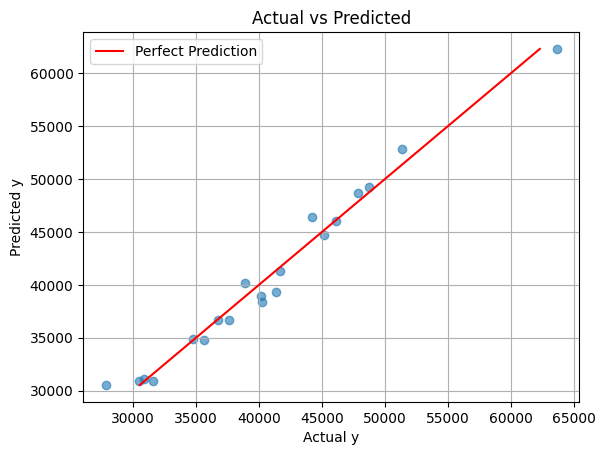

In [8]:

from matplotlib import pyplot as plt

# Compute predicted y values using the regression equation
yEquation = xMatrix @ bMatrix
print(yEquation)

# Plot
plt.scatter(lastCol, yEquation, alpha=0.6)
plt.plot([yEquation.min(), yEquation.max()], [yEquation.min(), yEquation.max()], color='red', label='Perfect Prediction')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()



## Step 6: Evaluate Model Performance

We calculate:
- Mean Squared Error (MSE)
- Sum of Squares Error (SSE)
- Total Sum of Squares (SST)
- Coefficient of Determination (R²)


In [9]:

mse = np.mean((yEquation - lastCol) ** 2)
print("Mean Squared Error (MSE):", mse)

sse = np.sum((yEquation - lastCol) ** 2)
sst = np.sum((lastCol - np.mean(lastCol)) ** 2)
r2 = 1 - (sse / sst)
print("R² Score:", r2)


Mean Squared Error (MSE): 1533633.9787141795
R² Score: 0.9773361310180797
